In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [54]:
data = pd.read_csv('data.csv')
data.head(5)

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [55]:
data.isnull().sum()

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64

In [56]:
data.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [57]:
data.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

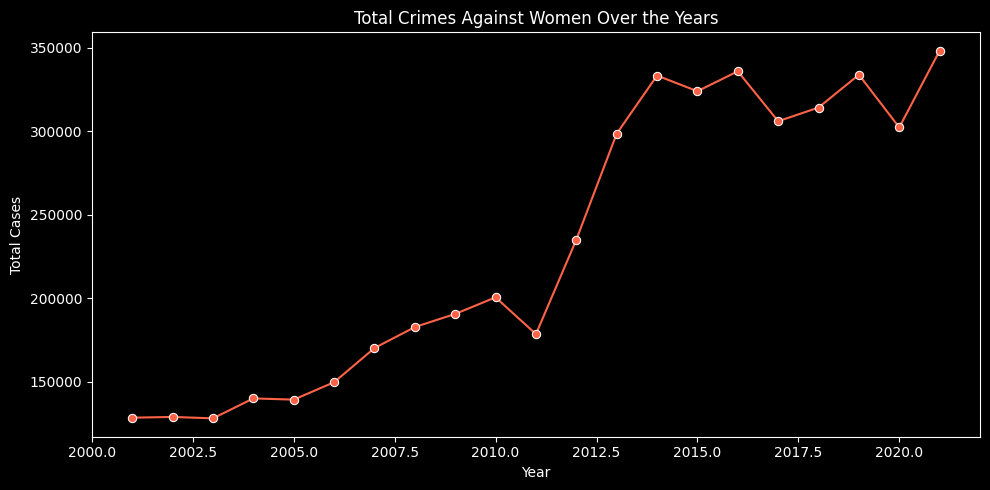

In [58]:
# 📊 Total cases per year (all types)
data['Total Crimes'] = data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

total_by_year = data.groupby('Year')['Total Crimes'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=total_by_year.index, y=total_by_year.values, marker='o', color='tomato')
plt.title("Total Crimes Against Women Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


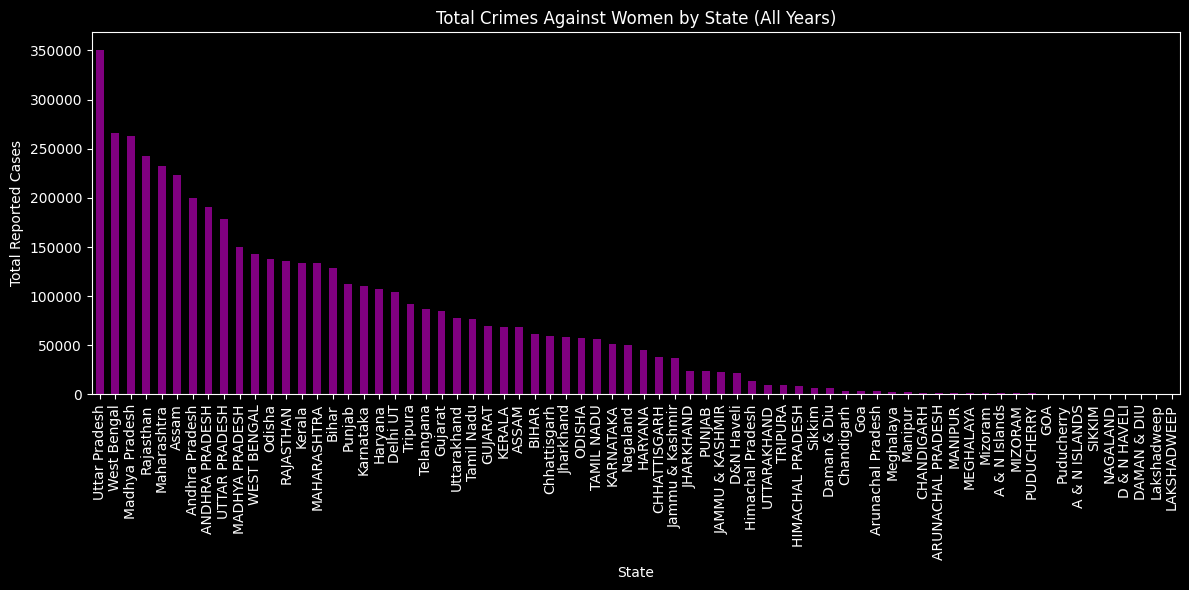

In [59]:
# 📍 Crimes by State (total of all years)
total_by_state = data.groupby('State')['Total Crimes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
total_by_state.plot(kind='bar', color='purple')
plt.title("Total Crimes Against Women by State (All Years)")
plt.xlabel("State")
plt.ylabel("Total Reported Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


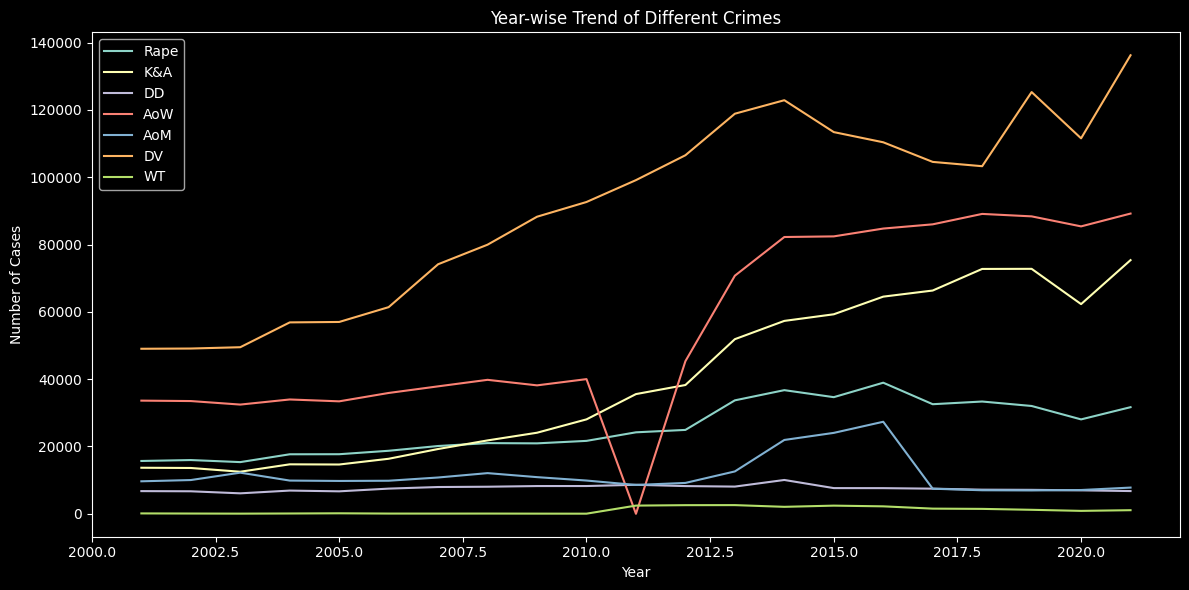

In [60]:
# 📈 Trend of individual crime types over years
crime_types = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
plt.figure(figsize=(12,6))

for crime in crime_types:
    trend = data.groupby('Year')[crime].sum()
    sns.lineplot(x=trend.index, y=trend.values, label=crime)

plt.title("Year-wise Trend of Different Crimes")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
data.shape

(736, 11)

/tmp/ipykernel_21779/4163745006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Year', y='Rape', palette='Reds_r')


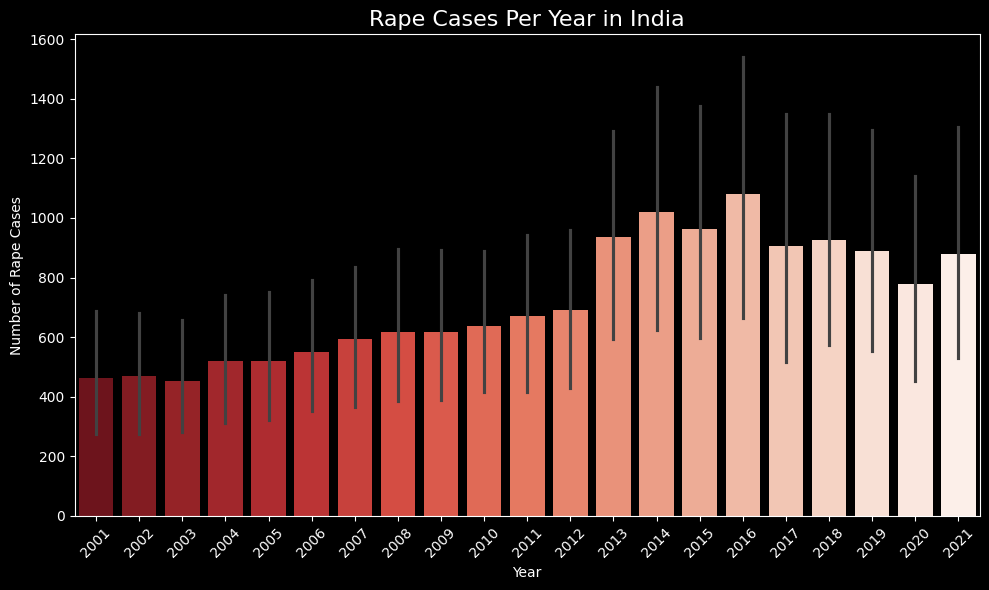

In [62]:
# Rape cases per year 
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Year', y='Rape', palette='Reds_r')
plt.title("Rape Cases Per Year in India", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Rape Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

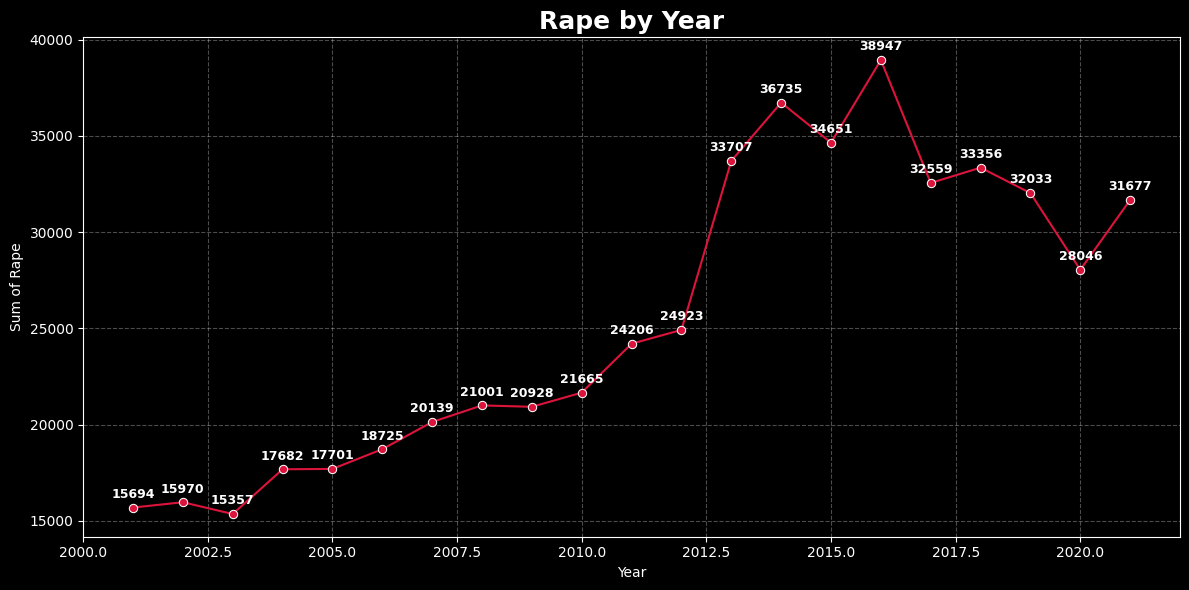

In [63]:
rape_by_year = data.groupby("Year")["Rape"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=rape_by_year, x="Year", y="Rape", marker='o', color='crimson')
for i in range(len(rape_by_year)):
    plt.text(rape_by_year["Year"][i], rape_by_year["Rape"][i]+500, str(rape_by_year["Rape"][i]), 
             ha='center', fontsize=9, color='white', weight='bold')
plt.title("Rape by Year", fontsize=18, weight='bold')
plt.xlabel("Year")
plt.ylabel("Sum of Rape")
plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.style.use("dark_background")
plt.tight_layout()
plt.show()

/tmp/ipykernel_21779/1426354311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rape_by_state, x="State", y="Rape", palette="coolwarm")


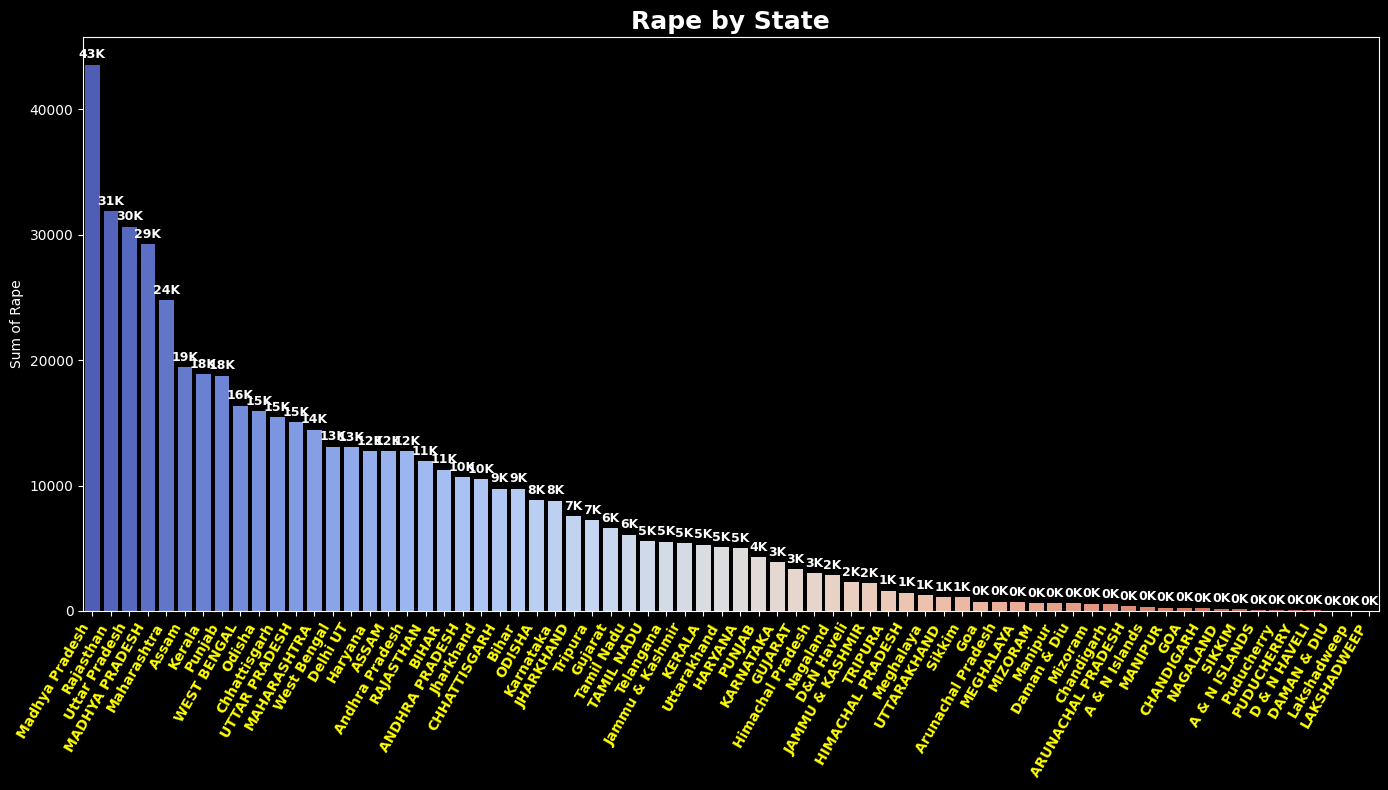

In [64]:
# Group by State
rape_by_state = data.groupby("State")["Rape"].sum().reset_index().sort_values(by="Rape", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=rape_by_state, x="State", y="Rape", palette="coolwarm")

# Add values on top
for i in range(len(rape_by_state)):
    plt.text(i, rape_by_state["Rape"].values[i]+500, 
             f"{rape_by_state['Rape'].values[i]//1000}K", 
             ha='center', fontsize=9, weight='bold', color='white')

plt.title("Rape by State", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("Sum of Rape")
plt.xticks(rotation=60, ha='right', fontsize=10, weight='bold', color='yellow')
plt.yticks(color='white')
plt.style.use("dark_background")
plt.tight_layout()
plt.show()


/tmp/ipykernel_21779/1404362209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rape_by_state, x="State", y="K&A", palette="coolwarm")


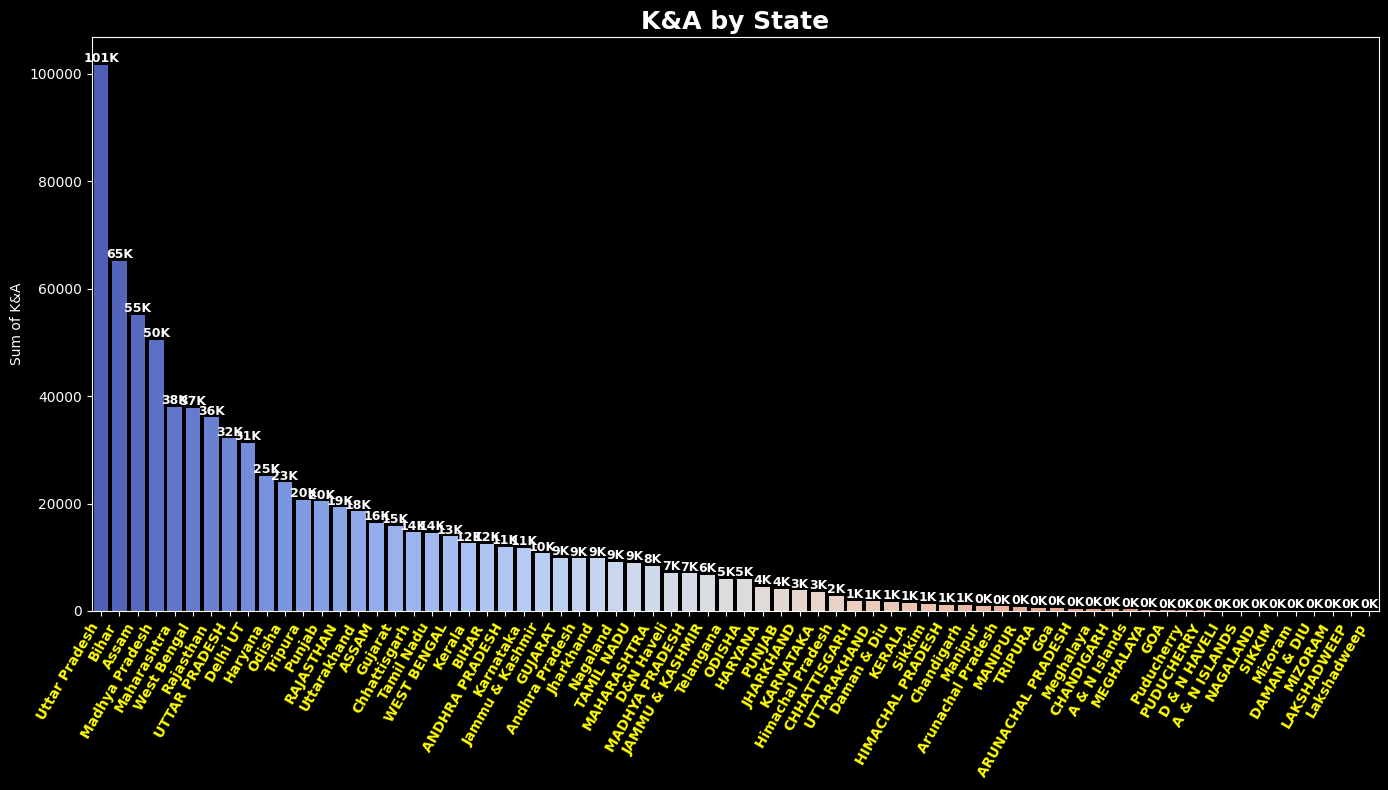

In [65]:
# Group by State
rape_by_state = data.groupby("State")["K&A"].sum().reset_index().sort_values(by="K&A", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=rape_by_state, x="State", y="K&A", palette="coolwarm")

# Add values on top
for i in range(len(rape_by_state)):
    plt.text(i, rape_by_state["K&A"].values[i]+500, 
             f"{rape_by_state['K&A'].values[i]//1000}K", 
             ha='center', fontsize=9, weight='bold', color='white')

plt.title("K&A by State", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("Sum of K&A")
plt.xticks(rotation=60, ha='right', fontsize=10, weight='bold', color='yellow')
plt.yticks(color='white')
plt.style.use("dark_background")
plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_lay'

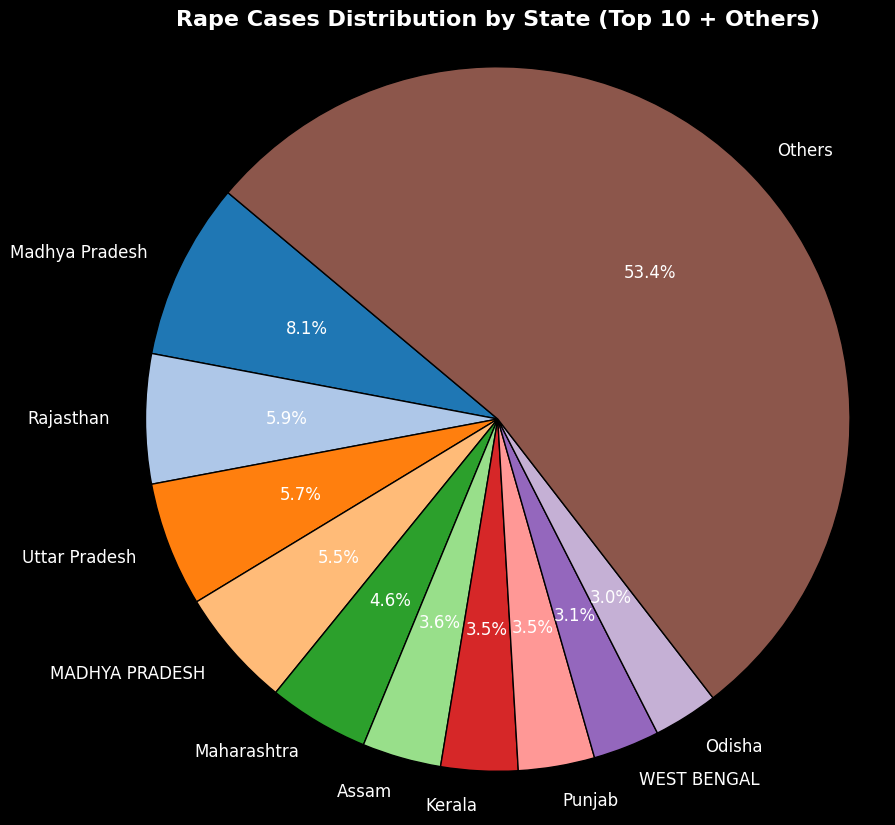

In [66]:
rape_by_state = data.groupby("State")["Rape"].sum().sort_values(ascending=False)

# Optional: Limit to top 10 states for readability
top_states = rape_by_state[:10]
others = rape_by_state[10:].sum()
top_states["Others"] = others

# Plot pie chart
plt.figure(figsize=(10, 10))
colors = plt.cm.tab20.colors  # You can customize this with any colormap

plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140, colors=colors,
        textprops={'fontsize': 12, 'color': 'white'}, wedgeprops={'edgecolor': 'black'})

plt.title("Rape Cases Distribution by State (Top 10 + Others)", fontsize=16, weight='bold', color='white')
plt.style.use("dark_background")
plt.axis('equal')  # Makes it a perfect circle
plt.tight_lay

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    736 non-null    int64 
 1   State         736 non-null    object
 2   Year          736 non-null    int64 
 3   Rape          736 non-null    int64 
 4   K&A           736 non-null    int64 
 5   DD            736 non-null    int64 
 6   AoW           736 non-null    int64 
 7   AoM           736 non-null    int64 
 8   DV            736 non-null    int64 
 9   WT            736 non-null    int64 
 10  Total Crimes  736 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 63.4+ KB


In [78]:
# Encode 'State' using LabelEncoder
le = LabelEncoder()
data['State_encoded'] = le.fit_transform(data['State'])

# Drop original 'State' if needed
data.drop(columns=['State'], inplace=True)

# Define features and target
X = data.drop(columns=['Total Crimes'])
y = data['Total Crimes']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.6, random_state=42
)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [80]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 820.79
RMSE: 2031.09
R² Score: 0.95


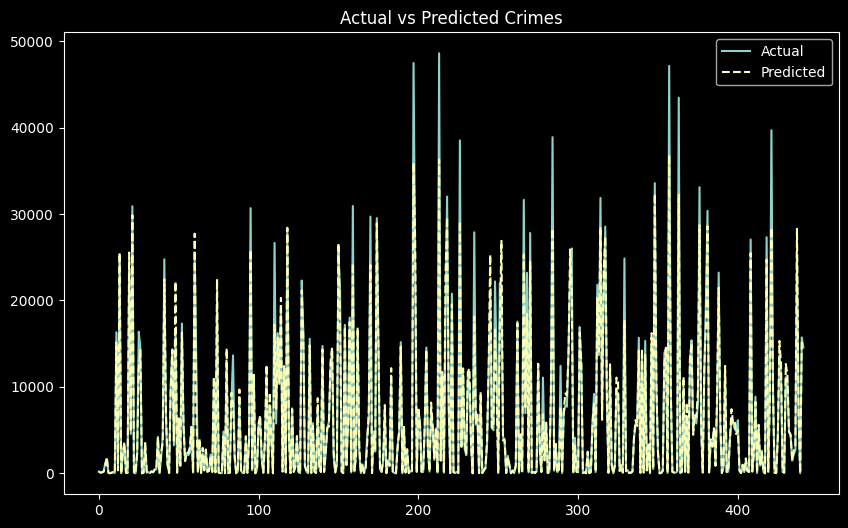

In [81]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Crimes')
plt.show()


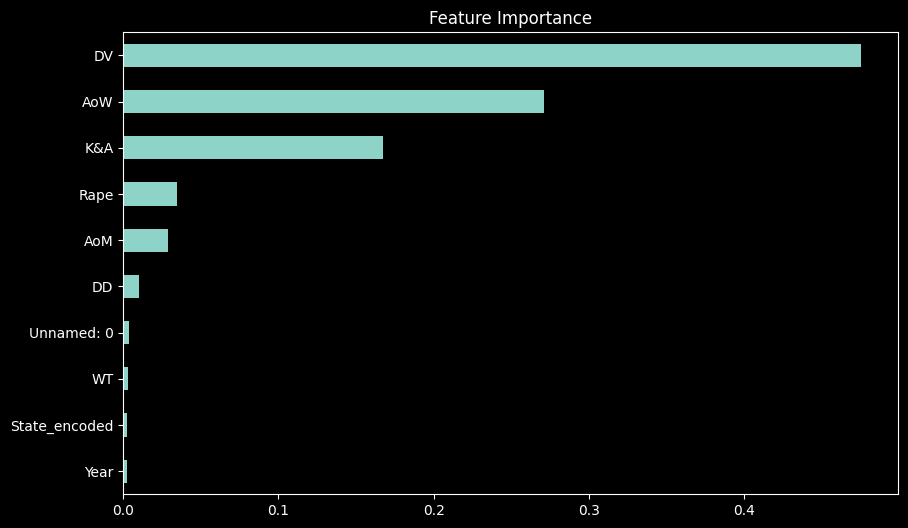

In [82]:
feature_names = data.drop(columns=['Total Crimes']).columns
importances = model.feature_importances_

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.show()


In [ ]:
data.columns
# data.head(5)

Index(['Unnamed: 0', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT',
       'Total Crimes', 'State_encoded'],
      dtype='object')

In [83]:
def predict_crimes_by_state(state_name, data, model, scaler, label_encoder):
    """
    Predict total crimes for a given state across all years in the dataset.
    """
    try:
        state_encoded = label_encoder.transform([state_name])[0]
    except ValueError:
        print(f"State '{state_name}' not found in label encoder.")
        return None

    state_data = data[data['State_encoded'] == state_encoded].copy()

    if state_data.empty:
        print("No data found for the specified state.")
        return None

    # MATCH training features exactly
    features = ['Unnamed: 0', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT', 'State_encoded']
    X = state_data[features]

    # Predict
    X_scaled = scaler.transform(X)
    predictions = model.predict(X_scaled)

    return pd.DataFrame({
        'Year': state_data['Year'].values,
        'Actual Total Crimes': state_data['Total Crimes'].values,
        'Predicted Total Crimes': predictions.astype(int)
    })



   Year  Actual Total Crimes  Predicted Total Crimes
0  2001                 4048                    4318
1  2002                 5001                    5179
2  2003                 5198                    5288
3  2004                 5636                    5839
4  2005                 5920                    5969
5  2006                 6741                    6780
6  2007                 6807                    6810
7  2008                 8082                    8354
8  2009                 9644                   11074
9  2010                11493                   11505
   Year  Actual Total Crimes  Predicted Total Crimes
0  2001                 4048                    4318
1  2002                 5001                    5179
2  2003                 5198                    5288
3  2004                 5636                    5839
4  2005                 5920                    5969
5  2006                 6741                    6780
6  2007                 6807                  

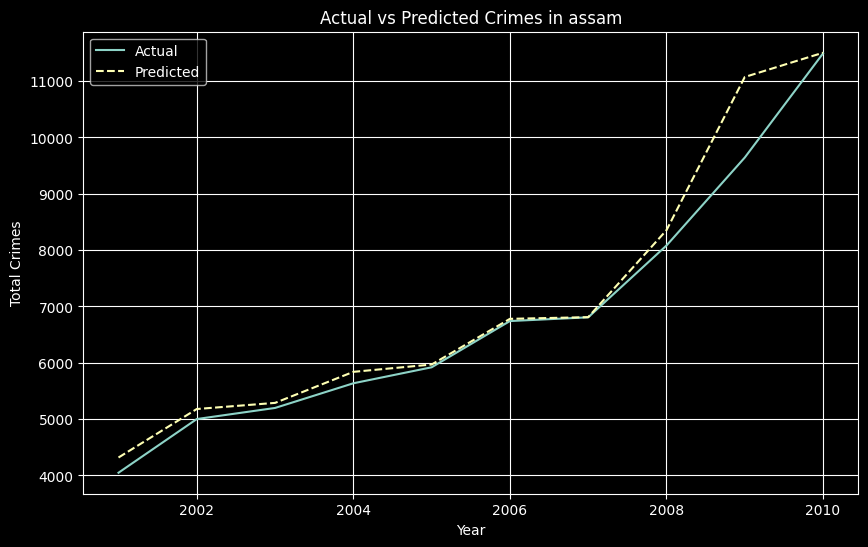

In [84]:
# Assuming data is your original dataset
result = predict_crimes_by_state("ASSAM", data, model, scaler, le)
print(result)

# Display prediction
print(result)


plt.figure(figsize=(10,6))
plt.plot(result['Year'], result['Actual Total Crimes'], label='Actual')
plt.plot(result['Year'], result['Predicted Total Crimes'], label='Predicted', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.title("Actual vs Predicted Crimes in assam")
plt.legend()
plt.grid(True)
plt.show()


In [85]:
# Make sure your dataset includes all the features used during training
features = ['Unnamed: 0', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT', 'State_encoded']
X = data[features]
y_true = data['Total Crimes']

# Scale features
X_scaled = scaler.transform(X)

# Predict
y_pred = model.predict(X_scaled)


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("🔢 Total Predictions:", len(y_pred))
print("✅ Mean Absolute Error (MAE):", round(mae, 2))
print("✅ Mean Squared Error (MSE):", round(mse, 2))
print("✅ R² Score:", round(r2, 4))


🔢 Total Predictions: 736
✅ Mean Absolute Error (MAE): 593.55
✅ Mean Squared Error (MSE): 2642592.38
✅ R² Score: 0.9677


In [87]:
import numpy as np
import pandas as pd

def predict_future_crimes(state_name, data, model, scaler, label_encoder, start_year=2011, end_year=2030):
    # Encode the state
    try:
        state_encoded = label_encoder.transform([state_name])[0]
    except ValueError:
        print(f"State '{state_name}' not found in encoder.")
        return None

    # Filter data for the state
    state_data = data[data['State_encoded'] == state_encoded].copy()

    # Features to project
    crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    
    # Get last 5-year averages of annual changes for each column
    trends = {}
    for col in crime_cols:
        trends[col] = state_data[col].diff().rolling(window=5).mean().iloc[-1]

    # Start from last known values
    last_row = state_data.iloc[-1]
    future_data = []

    for year in range(start_year, end_year + 1):
        new_row = {}
        new_row['Unnamed: 0'] = last_row['Unnamed: 0'] + (year - last_row['Year'])  # dummy index
        new_row['Year'] = year

        # Project each feature
        for col in crime_cols:
            last_value = future_data[-1][col] if future_data else last_row[col]
            new_row[col] = max(0, last_value + trends[col])  # avoid negatives

        new_row['State_encoded'] = state_encoded
        future_data.append(new_row)

    future_data = pd.DataFrame(future_data)

    # Reorder and scale
    features = ['Unnamed: 0', 'Year'] + crime_cols + ['State_encoded']
    X_future = scaler.transform(future_data[features])

    # Predict
    predictions = model.predict(X_future).astype(int)

    # Final result
    result_data = pd.DataFrame({
        'Year': future_data['Year'],
        'Predicted Total Crimes': predictions
    })

    return result_data


In [88]:
future_predictions = predict_future_crimes("ASSAM", data, model, scaler, le, start_year=2011, end_year=2030)
print(future_predictions)


    Year  Predicted Total Crimes
0   2011                   11773
1   2012                   13198
2   2013                   13856
3   2014                   15450
4   2015                   17491
5   2016                   19356
6   2017                   19368
7   2018                   20164
8   2019                   21144
9   2020                   22359
10  2021                   23435
11  2022                   24189
12  2023                   24295
13  2024                   24863
14  2025                   24899
15  2026                   24949
16  2027                   25001
17  2028                   25126
18  2029                   25521
19  2030                   25577


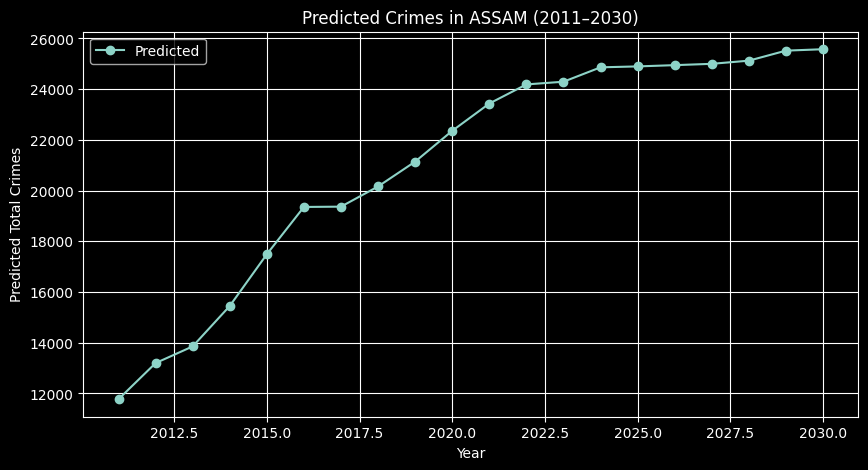

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(future_predictions['Year'], future_predictions['Predicted Total Crimes'], marker='o', label='Predicted')
plt.title("Predicted Crimes in ASSAM (2011–2030)")
plt.xlabel("Year")
plt.ylabel("Predicted Total Crimes")
plt.grid(True)
plt.legend()
plt.show()


In [91]:
def predict_future_crimes_with_types(state_name, data, model, scaler, label_encoder, start_year=2011, end_year=2030):
    state_encoded = label_encoder.transform([state_name])[0]

    # Historical data for the state
    state_data = data[data['State_encoded'] == state_encoded].copy()
    crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    
    # Calculate trend (5-year rolling mean of differences)
    trends = {col: state_data[col].diff().rolling(5).mean().iloc[-1] for col in crime_cols}
    last_row = state_data.iloc[-1]
    future_data = []

    for year in range(start_year, end_year + 1):
        new_row = {'Unnamed: 0': last_row['Unnamed: 0'] + (year - last_row['Year']), 'Year': year}
        for col in crime_cols:
            last_value = future_data[-1][col] if future_data else last_row[col]
            new_row[col] = max(0, last_value + trends[col])
        new_row['State_encoded'] = state_encoded
        future_data.append(new_row)

    future_data = pd.DataFrame(future_data)

    # Predict total crimes
    features = ['Unnamed: 0', 'Year'] + crime_cols + ['State_encoded']
    X_future = scaler.transform(future_data[features])
    total_predictions = model.predict(X_future)

    # Append predictions
    future_data['Predicted Total Crimes'] = total_predictions
    return future_data[['Year'] + crime_cols + ['Predicted Total Crimes']]


    Year    Rape      K&A      DD     AoW  AoM       DV  WT  \
0   2011  1632.2   6110.4  2347.6  2984.6    0   8672.6   0   
1   2012  1701.4   6752.8  2478.2  3176.2    0   9367.2   0   
2   2013  1770.6   7395.2  2608.8  3367.8    0  10061.8   0   
3   2014  1839.8   8037.6  2739.4  3559.4    0  10756.4   0   
4   2015  1909.0   8680.0  2870.0  3751.0    0  11451.0   0   
5   2016  1978.2   9322.4  3000.6  3942.6    0  12145.6   0   
6   2017  2047.4   9964.8  3131.2  4134.2    0  12840.2   0   
7   2018  2116.6  10607.2  3261.8  4325.8    0  13534.8   0   
8   2019  2185.8  11249.6  3392.4  4517.4    0  14229.4   0   
9   2020  2255.0  11892.0  3523.0  4709.0    0  14924.0   0   
10  2021  2324.2  12534.4  3653.6  4900.6    0  15618.6   0   
11  2022  2393.4  13176.8  3784.2  5092.2    0  16313.2   0   
12  2023  2462.6  13819.2  3914.8  5283.8    0  17007.8   0   
13  2024  2531.8  14461.6  4045.4  5475.4    0  17702.4   0   
14  2025  2601.0  15104.0  4176.0  5667.0    0  18397.0

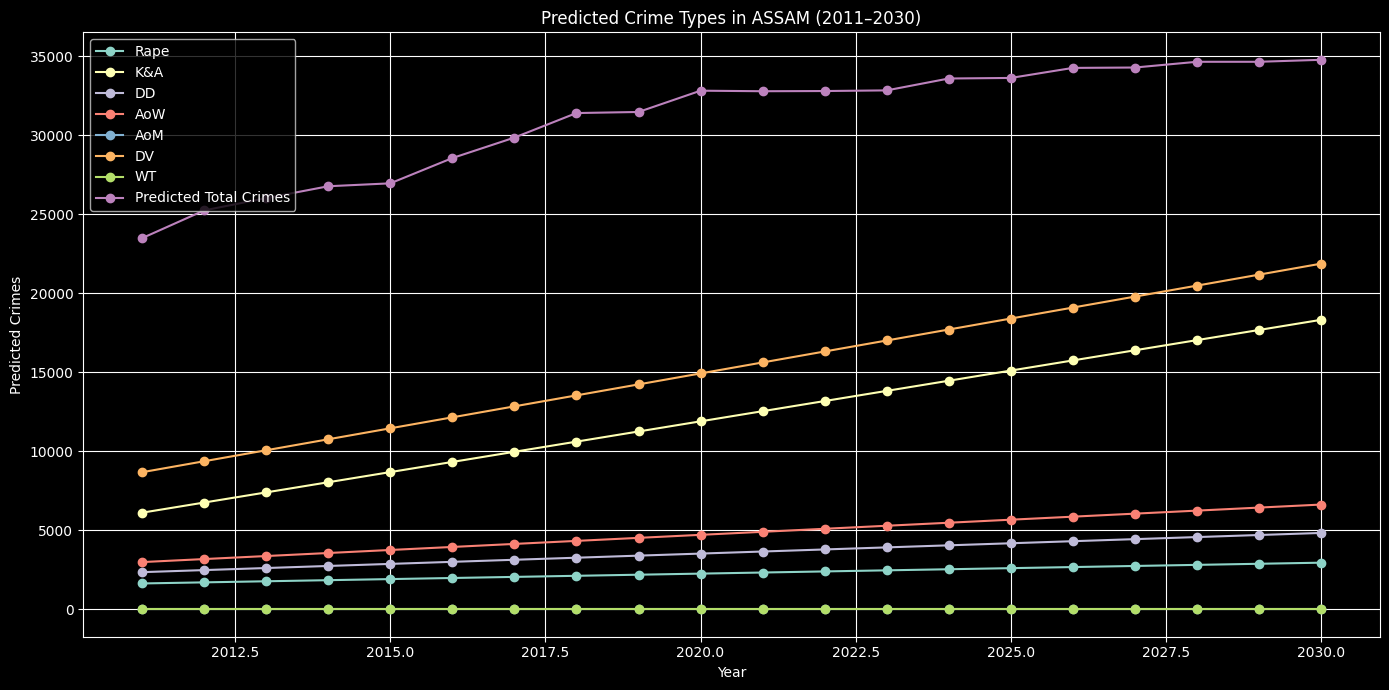

In [94]:
import matplotlib.pyplot as plt

# Get future prediction data
future_data = predict_future_crimes_with_types("UTTAR PRADESH", data, model, scaler, le)
print(future_data)
# Plot
plt.figure(figsize=(14, 7))
for col in ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT', 'Predicted Total Crimes']:
    plt.plot(future_data['Year'], future_data[col], marker='o', label=col)

plt.title("Predicted Crime Types in ASSAM (2011–2030)")
plt.xlabel("Year")
plt.ylabel("Predicted Crimes")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [98]:
import pickle

# Save your trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
 